In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as fit

In [13]:
def exponent(x, a, b):
    return np.exp((x - a) / b)

In [14]:
temp_dict_led = {0:28, 1:-45, 2:-84.5, 3:-137, 4:-166}
temp_dict_diod = {5:20, 6:-68, 7:-130, 8:-170, 9:-195}

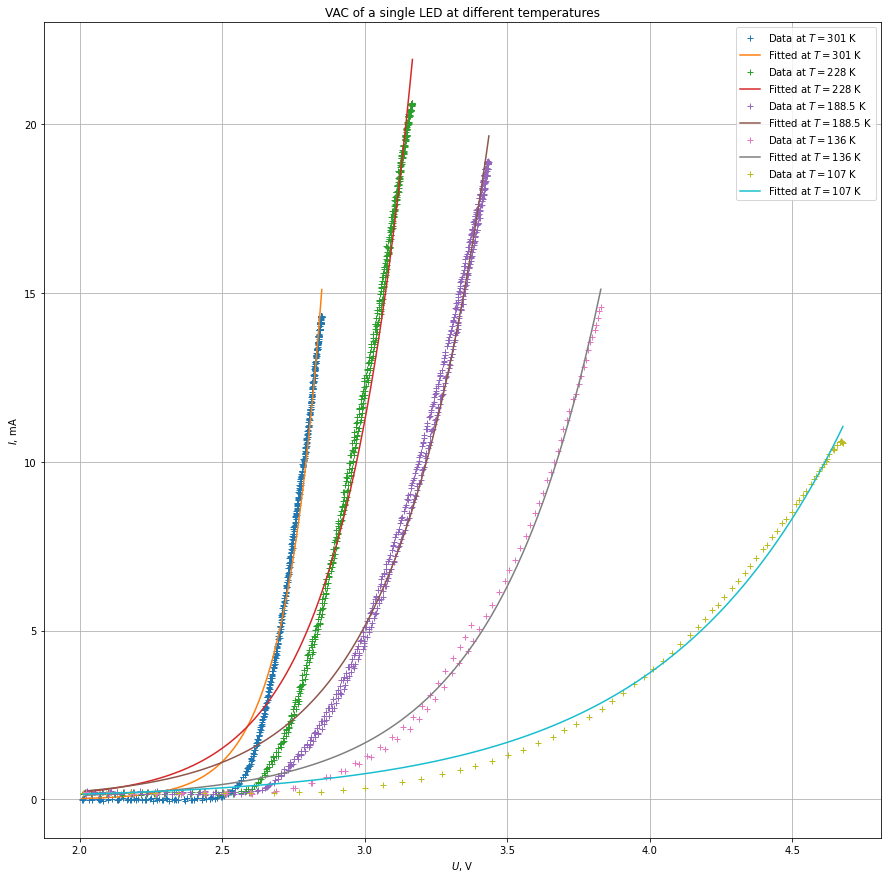

In [23]:
# LED
plt.figure(figsize=(15, 15))
for i in range(0, 5):
    filename = 'scope_{}.csv'.format(i)
    df = pd.read_csv(filename, header=1)
    df['Volt.1'] = -df['Volt.1']
    df['Volt'] = -df['Volt']
    df.dropna(inplace=True)
    x_full = (df['Volt'] - df['Volt.1'])[df['Volt'] - df['Volt.1'] > 2][500:]
    y_full = (df['Volt.1'] / 100)[df['Volt'] - df['Volt.1'] > 2][500:] * 1000
    if (i == 3):
        x_full = (df['Volt'] - df['Volt.1'])[df['Volt'] - df['Volt.1'] > 2][1010:]
        y_full = (df['Volt.1'] / 100)[df['Volt'] - df['Volt.1'] > 2][1010:] * 1000
    x = np.linspace(x_full.min(), x_full.max(), int(1e3))
    plt.plot(x_full, y_full, '+', label='Data at $T = {}$ K'.format(temp_dict_led[i] + 273))
    a, b = fit(exponent, x_full, y_full)[0]
    plt.plot(x, np.exp((x - a) / b), '-', label='Fitted at $T = {}$ K'.format(temp_dict_led[i] + 273))
plt.grid()
plt.legend()
plt.xlabel('$U$, V')
plt.ylabel('$I$, mA')
plt.title('VAC of a single LED at different temperatures')
plt.savefig('LED.pdf')
plt.show()

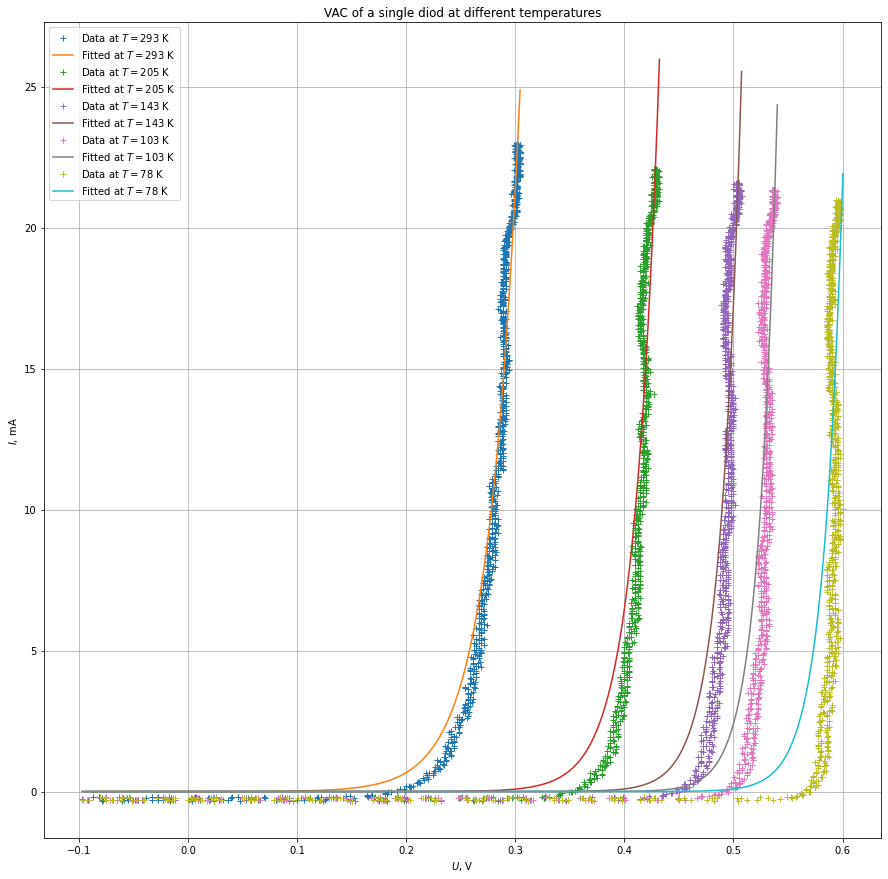

In [19]:
# Diod
plt.figure(figsize=(15, 15))
for i in range(5, 10):
    filename = 'scope_{}.csv'.format(i)
    df = pd.read_csv(filename, header=1)
    df['Volt.1'] = df['Volt.1']
    df['Volt'] = df['Volt']
    df.dropna(inplace=True)
    x_full = (df['Volt'] - df['Volt.1'])[df['Volt'] - df['Volt.1'] > -0.1]
    y_full = (df['Volt.1'] / 100)[df['Volt'] - df['Volt.1'] > -0.1] * 1000
    x = np.linspace(x_full.min(), x_full.max(), int(1e3))
    plt.plot(x_full, y_full, '+', label='Data at $T = {}$ K'.format(temp_dict_diod[i] + 273))
    a, b = fit(exponent, x_full, y_full)[0]
    plt.plot(x, np.exp((x - a) / b), '-', label='Fitted at $T = {}$ K'.format(temp_dict_diod[i]+ 273))
plt.grid()
plt.legend()
plt.xlabel('$U$, V')
plt.ylabel('$I$, mA')
plt.title('VAC of a single diod at different temperatures')
plt.savefig('Diode.pdf')
plt.show()